# compareing GMMs and k-means clustering

Gaussian Mixture Models (**GMMs**) are a **probabilistic** model used for clustering and density estimation. They can be viewed as an extension of the ideas behind k-means clustering, but with additional flexibility and probabilistic interpretation.

how GMMs extend the concepts of k-means:

Probabilistic Representation:

Unlike **k-means**, which **assigns each data point to one cluster centroid**, GMMs represent each cluster as a probability distribution characterized by its mean and covariance matrix. Each data point is assumed to be generated by a mixture of multiple Gaussian distributions, with each Gaussian representing a cluster.

Soft Assignments:

**In k-means**, **each data point** is **hard-assigned** to a single cluster centroid, meaning it **belongs to one cluster**. In contrast, **GMMs** use  **soft assignments**, where each data point is assigned a            **probability (membership weight) of belonging to each clusters**. This soft assignment allows for more flexibility in capturing the underlying structure of the data, especially when clusters overlap.


Cluster Shape Flexibility:

While **k-means assumes** that clusters are **spherical and isotropic** (i.e., they have equal variance along all dimensions), GMMs allow for clusters with arbitrary shapes by modeling each cluster with a multivariate Gaussian distribution. This allows GMMs to capture more complex data distributions.


Modeling Density:

**GMMs can also be used for density estimation**, where they model the probability density function of the data. This is particularly useful in cases where the underlying distribution of the data is not well-represented by a single Gaussian distribution.


Overall, GMMs provide a more flexible and probabilistic framework for clustering and density estimation compared to k-means, making them suitable for a wider range of data distributions and applications.

<ipython-input-1-08776828c2b3>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


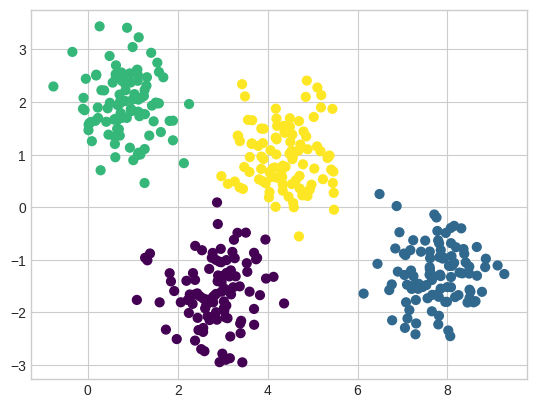

In [1]:
# Cell 1: Import necessary libraries and generate data
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1]  # flip axes for better plotting

# Plot the data with k-means labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');



In [2]:
# Cell 2: Define function to plot KMeans clusters
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, ec='black', fc='lightgray',
                                lw=3, alpha=0.5, zorder=1))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


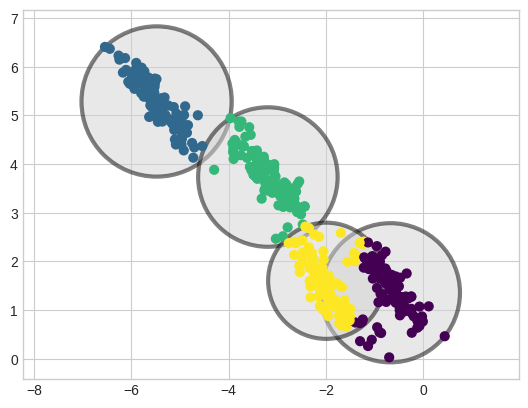

In [3]:
# Cell 3: Apply KMeans clustering to stretched data
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

#circular clusters would be a poor fit


main problem of K-means is overlabing between clusters and not seprated data:

- lack of flexibility in cluster shape

- for well-separated data---> k-means finds suitable clustering results.


- k-means is suitable for circular  clusters and has no built-in way of accounting for oblong or elliptical clusters (too much overlab)

- lack of probabilistic cluster assignment ---> each data relataed to only one cluster ---> with probabilistic we can find relationship of each data to another clusters.




# GMMs


Gaussian Mixture Models (GMMs) are probabilistic models used for clustering data. Unlike K-means, which assigns each point to one cluster centroid, GMMs assign each point a probability of belonging to each cluster.

Here's how GMMs work in clustering:

Model Representation: In GMMs, each cluster is represented by a multivariate Gaussian distribution. The overall distribution of the data is a mixture of these Gaussians.

Parameters: The parameters of a GMM include the mean and covariance matrix of each Gaussian component, as well as the mixing coefficients that determine the relative weight of each component in the mixture.

Expectation-Maximization (EM) Algorithm: The EM algorithm is typically used to estimate the parameters of the GMM. It alternates between two steps:

Expectation Step: In this step, the algorithm computes the probability that each data point belongs to each cluster using the current parameter estimates.

Maximization Step: In this step, the algorithm updates the parameters to maximize the likelihood of the data given the current assignments.

Cluster Assignment: Once the parameters are estimated, each data point is assigned to the cluster with the highest probability.

Soft Clustering: GMMs provide soft clustering, meaning that each data point can belong to multiple clusters with different probabilities. This is in contrast to K-means, which provides hard clustering.

Variational Inference: In practice, variational inference is often used instead of the EM algorithm for parameter estimation. Variational inference approximates the true posterior distribution over the latent variables (cluster assignments) using a simpler distribution.

Overall, GMMs offer more flexibility than K-means and can capture complex structures in the data. They are particularly useful when the clusters are not well-separated or have different sizes and shapes.

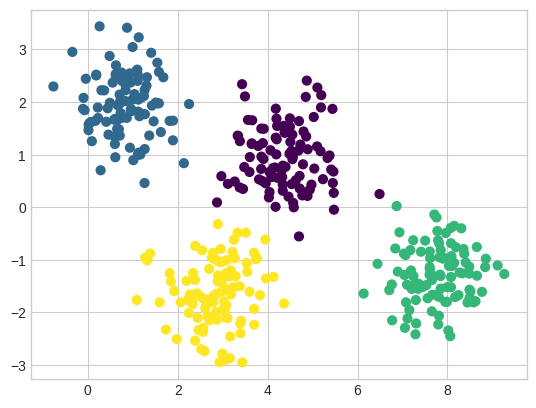

In [4]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

# Fit Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)

# Plot the data with GMM labels
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.show()


 Compute the probabilities of each data point belonging to each cluster using predict_proba.

[[0.537 0.    0.463 0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]]


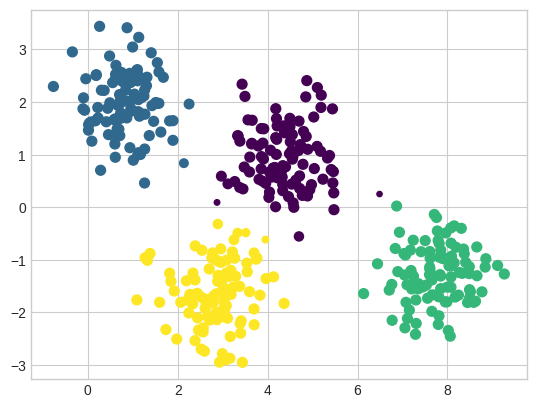

In [5]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)
plt.show()


- Define a function draw_ellipse to draw ellipses representing Gaussian distributions.

- Generate a stretched version of the data using a random transformation.

<ipython-input-6-8d0ac39ecc1f>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


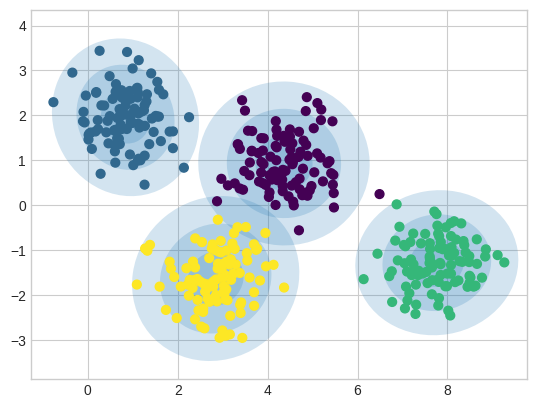

In [6]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)
plt.show()


<ipython-input-6-8d0ac39ecc1f>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


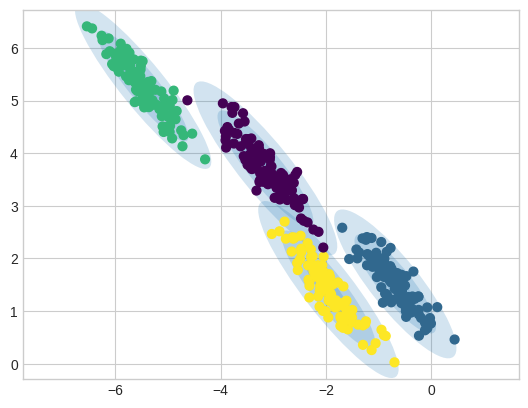

In [7]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X_stretched)
plt.show()


**The "covariance_type" hyperparameter **in Gaussian Mixture Models (GMMs) controls how the covariance matrix of each component in the mixture model is estimated. The choice of covariance type influences the shape of the clusters and the flexibility of the model. Here's an explanation of the three options:

covariance_type="diag": This option assumes that the dimensions of the data are independent of each other within each cluster. In other words, it assumes that the covariance matrix of each cluster is diagonal, meaning that the variance along each dimension can be set independently. The resulting ellipses for each cluster are aligned with the axes. This is the default option in scikit-learn's GMM implementation and is suitable when the dimensions of the data are relatively independent.

covariance_type="spherical": This option is a simplified version of "diag" where it assumes that all dimensions have the same variance. In other words, it constrains the shape of each cluster to be spherical, meaning that the spread of the cluster is the same in all directions. This option can be computationally more efficient and is suitable when the clusters have similar variances along all dimensions.

covariance_type="full": This option allows each cluster to have its own arbitrary covariance matrix, without any constraints on its orientation or shape. Each cluster is represented by an ellipse with arbitrary orientation and size. This option provides the most flexibility but is computationally more expensive, especially as the number of dimensions increases. It is suitable when the clusters have complex shapes and orientations, and the dimensions are correlated with each other.

In summary, the choice of covariance type depends on the characteristics of the data and the desired trade-off between model complexity and computational efficiency. "diag" and "spherical" are simpler and faster options, while "full" provides more flexibility but requires more computational resources.

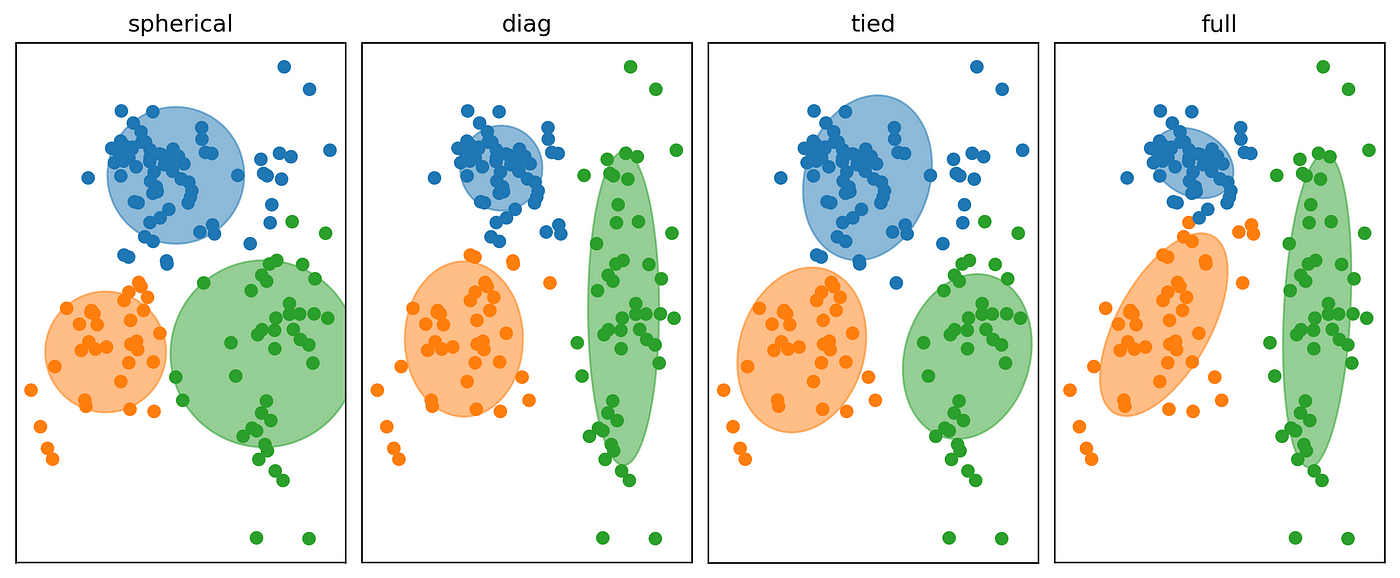

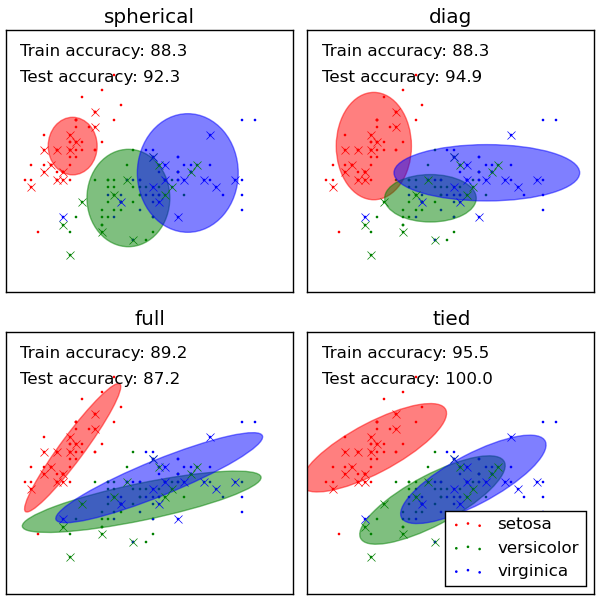

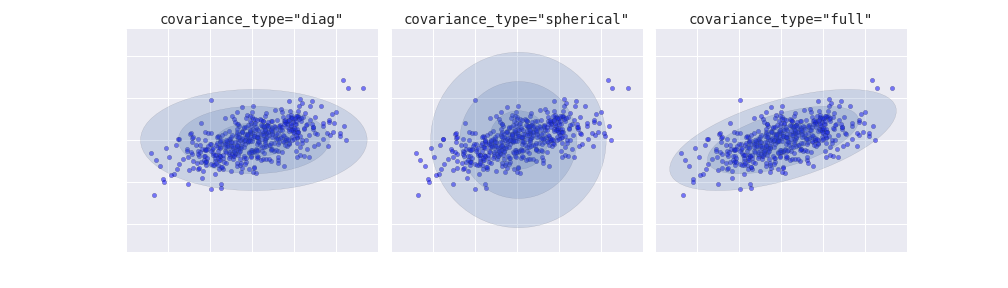

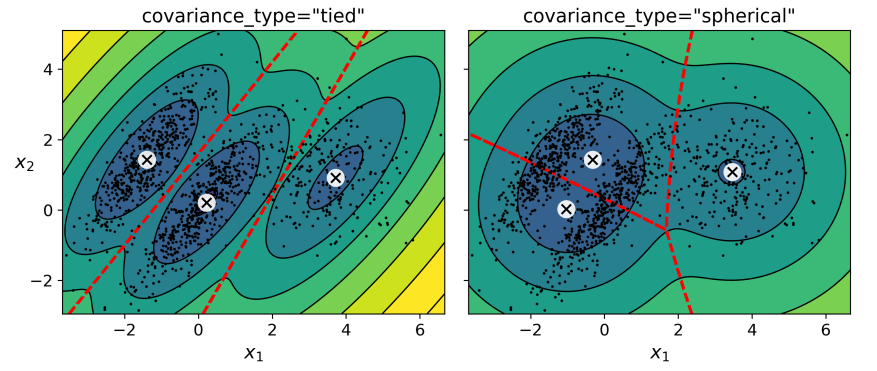

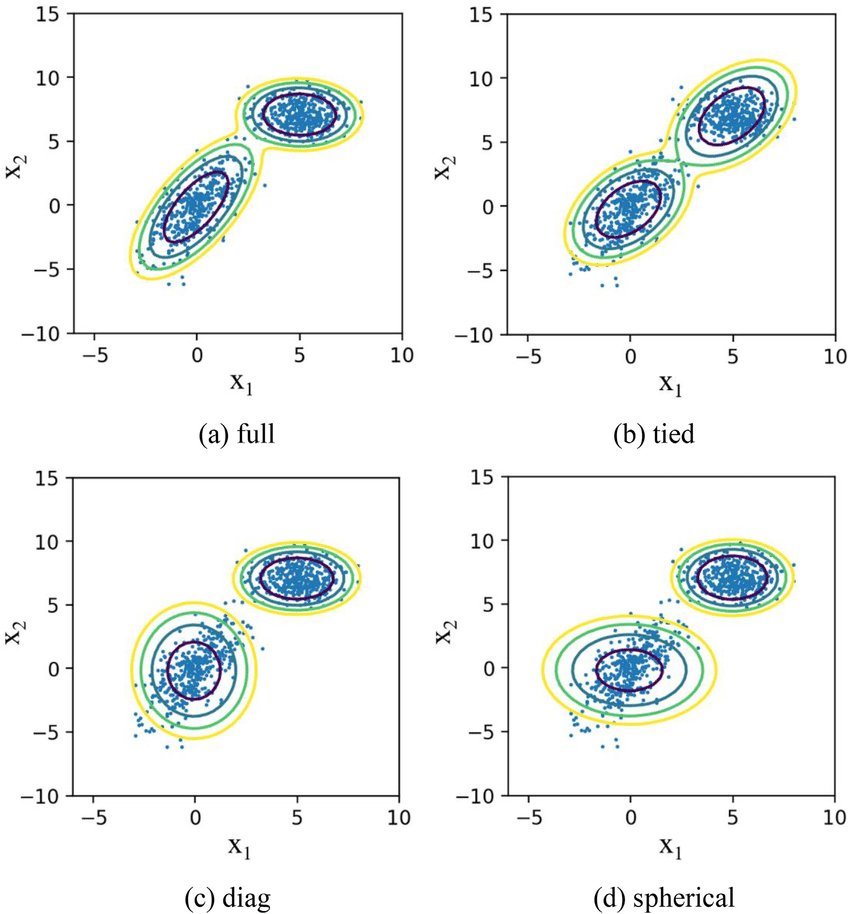

# Gaussian Mixture Models as Density Estimation

Gaussian Mixture Models (GMMs) can be used not only for clustering but also for density estimation. Density estimation is the task of estimating the probability density function (PDF) of a random variable based on a set of observed data points. In the context of GMMs, density estimation involves fitting a mixture of Gaussian distributions to the data, where each Gaussian component represents a cluster in the data.


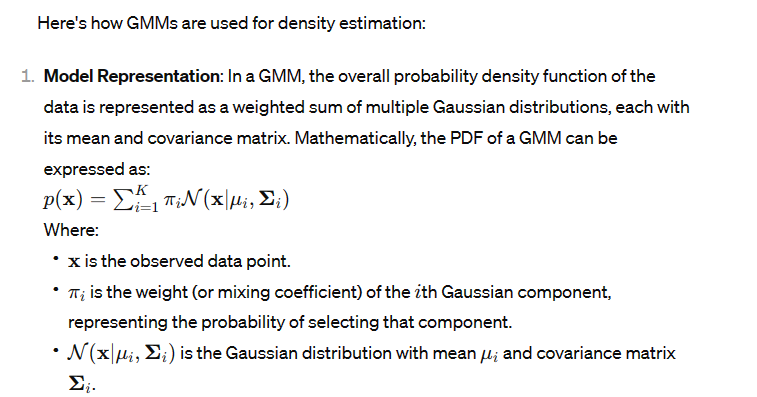

2- Parameter Estimation: The parameters of the GMM, including the means, covariances, and mixing coefficients, are estimated from the observed data using an algorithm such as the Expectation-Maximization (EM) algorithm. The EM algorithm iteratively maximizes the likelihood of the observed data under the GMM.

3- Density Estimation: Once the GMM parameters are estimated, the model can be used to estimate the probability density of any new data point. This is done by evaluating the PDF expression for the GMM at the given data point. The resulting density estimate represents the likelihood of observing that data point under the learned mixture of Gaussians.

Applications: GMMs for density estimation have various applications, including:

**Anomaly detection**: Detecting data points with low probability density (outliers) based on the learned GMM.

**Data visualization**: Representing high-dimensional data in a lower-dimensional space by modeling the underlying density using GMMs.

**Generation of synthetic data**: Sampling new data points from the learned GMM to generate synthetic data that resembles the original dataset.


In summary, GMMs provide a flexible and powerful framework for estimating the probability density of data, making them valuable for various tasks in machine learning and data analysis.







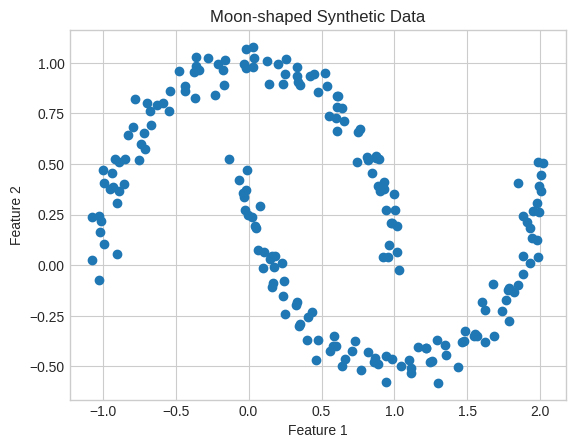

In [8]:
# Import necessary libraries
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate moon-shaped synthetic data
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)

# Plot the synthetic data
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])
plt.title("Moon-shaped Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


<ipython-input-6-8d0ac39ecc1f>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


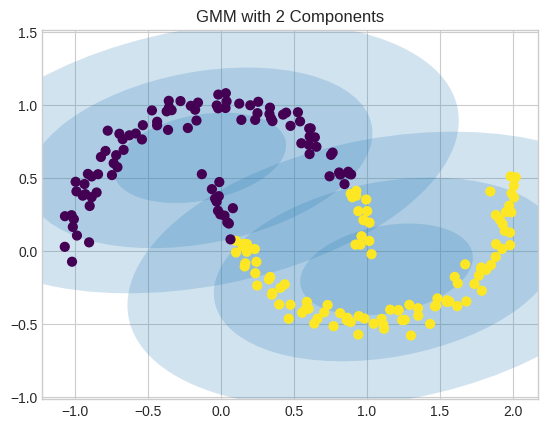

In [9]:
# Fit GMM with 2 components and plot the clusters
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)
plt.title("GMM with 2 Components")
plt.show()

# as you can see the results are not particularly useful


<ipython-input-6-8d0ac39ecc1f>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


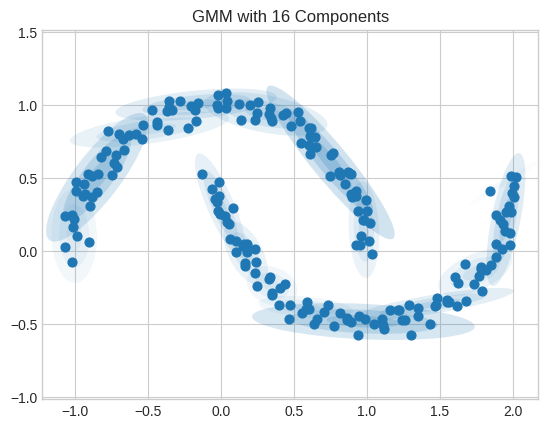

In [10]:
# Fit GMM with 16 components and plot the clusters
#  ignore the cluster labels
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)
plt.title("GMM with 16 Components")
plt.show()

# we find a fit that is much closer to the input data

# generating new data

"Here the mixture of 16 Gaussian components serves not to find separated clusters of data, but rather to model the overall distribution of the input data."

In this context, the Gaussian Mixture Model (GMM) with 16 components is not being used to identify distinct clusters within the data. Instead, it is employed to understand and model the underlying distribution of the entire dataset.

Unlike clustering algorithms like k-means, where the goal is to partition the data into distinct groups, GMM focuses on representing the distribution of data points in a probabilistic manner.
"This is a generative model of the distribution, meaning that the GMM gives us the recipe to generate new random data distributed similarly to our input."

GMM is considered a generative model because it provides a probabilistic framework for generating new data points that follow a distribution similar to the original dataset.
By learning the parameters of the Gaussian components from the data, GMM can provide a recipe or model that allows us to generate synthetic data points that mimic the characteristics of the observed data.

"For example, here are 400 new points drawn from this 16-component GMM fit to our original data"

In this specific example, 400 new data points are generated using the learned 16-component GMM model fitted to the original dataset.

These new points are not directly sampled from the original dataset but are generated based on the learned distribution represented by the GMM.

The generated points are expected to exhibit similar statistical properties as the original dataset, capturing its underlying structure and variability.

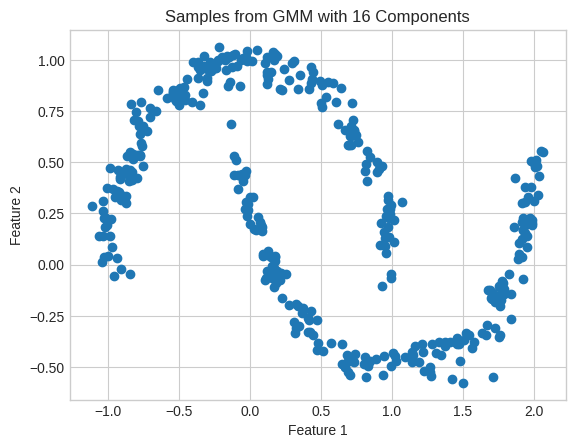

In [11]:
# Sample 400 points from the GMM with 16 components and plot
Xnew, ynew = gmm16.sample(400)
plt.scatter(Xnew[:, 0], Xnew[:, 1])
plt.title("Samples from GMM with 16 Components")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



To find the best number of components for your Gaussian Mixture Model (GMM), you can use the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC). These criteria provide a way to balance the goodness of fit of the model with its complexity, helping to avoid overfitting.

Here's how you can use BIC and AIC to determine the optimal number of components:

Calculate BIC and AIC: Fit GMM models with different numbers of components to your data and compute the BIC and AIC for each model.

Choose the model with the lowest BIC or AIC: Lower values of BIC and AIC indicate better models. The model with the lowest BIC or AIC is considered the best trade-off between goodness of fit and complexity.

Visualize the results: **Plot the BIC and AIC values** against the number of components. You should **observe a point where the values start to level off** or **decrease more slowly**. **This point represents the optimal number** of **components**.

- We evaluate the Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) for GMMs with different numbers of components.

- We fit GMMs with 1 to 20 components to the synthetic data and store the models in the models list.

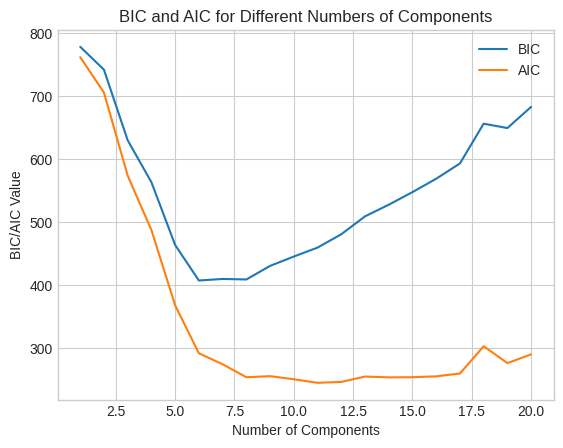

In [12]:
# Evaluate BIC and AIC for different numbers of components
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number of Components')
plt.ylabel('BIC/AIC Value')
plt.title('BIC and AIC for Different Numbers of Components')
plt.show()


# The AIC tells us that our choice of 16 components earlier was probably too many
# around 7–12 components would have been a better choice

<ipython-input-6-8d0ac39ecc1f>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


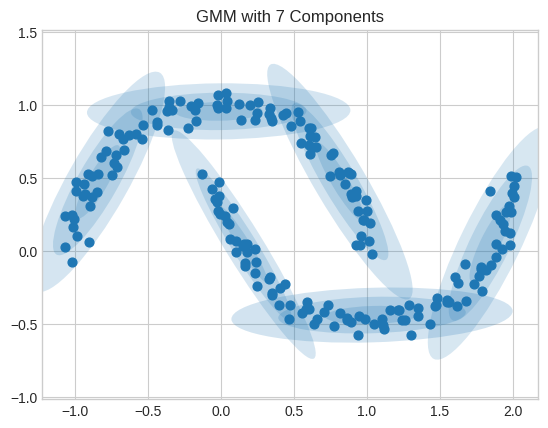

In [15]:
gmm7 = GaussianMixture(n_components=6, covariance_type='full', random_state=0)
plot_gmm(gmm7, Xmoon, label=False)
plt.title("GMM with 7 Components")
plt.show()

# image Example of GMMs for Generating New Data

In [16]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
digits.data.shape

# (1797, 64)----> We have nearly 1,800  digits in 64 dimensions


(1797, 64)

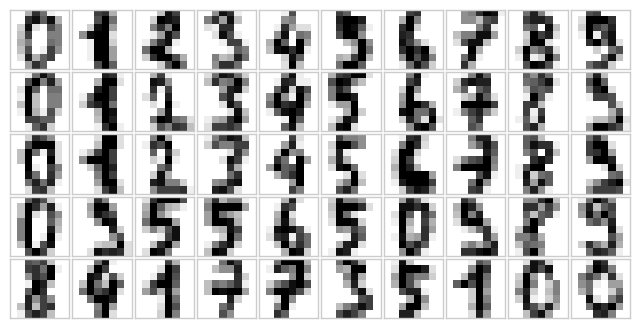

In [17]:
# let's plot the first 50 of these to recall exactly
def plot_digits(data):
    # Create a plot to display the digits
    fig, ax = plt.subplots(5, 10, figsize=(8, 4),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    # Iterate over the data and plot each digit
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)

# Plot the digits
plot_digits(digits.data)


In [18]:
# GMMs can have difficulty converging in such a high-dimensional space, so we will start with an invertible dimensionality reduction algorithm on the data
#PCA (Principal Component Analysis) is applied to reduce the dimensionality of the dataset while preserving 99% of its variance.

from sklearn.decomposition import PCA
import numpy as np

# Perform PCA to reduce dimensionality
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

# 64----> 41 , The result is 41 dimensions, a reduction of nearly 1/3 with almost no information loss


(1797, 41)

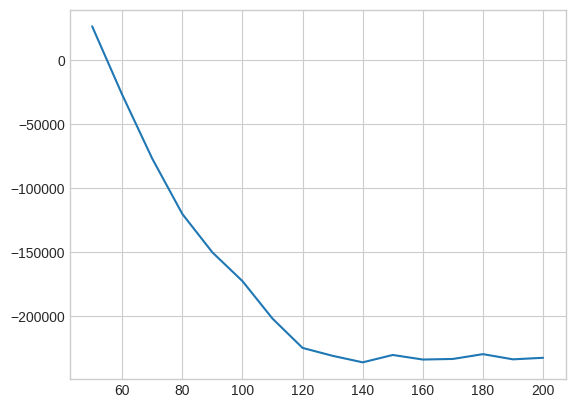

In [19]:
# We define a range of components to test for the Gaussian Mixture Model (GMM)
# The Akaike Information Criterion (AIC) is computed for each model to evaluate its quality.

n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);


In [20]:
# We instantiate a Gaussian Mixture Model (GMM) with the optimal number of components determined from the AIC analysis.
# The GMM is fitted to the transformed data.

from sklearn.mixture import GaussianMixture

# Fit a GMM with the optimal number of components
gmm = GaussianMixture(140, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)


True


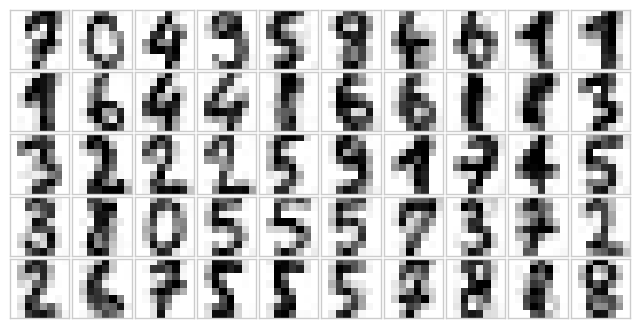

In [22]:
# We generate new samples from the fitted GMM.
# The generated data is transformed back to the original space using the inverse PCA transformation.


# Generate new samples from the GMM
data_new, _ = gmm.sample(100)
data_new.shape

# Perform inverse transformation to get the digits
digits_new = pca.inverse_transform(data_new)

# Plot the generated digits
plot_digits(digits_new)
